In [1]:
# import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
df = pd.read_csv("Loan_default.csv")
data_array = df.to_numpy()


In [3]:

pd.set_option("display.max_columns",None)
print("Shape of the dataset :",df.shape)
df.head()

Shape of the dataset : (255347, 18)


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [4]:
#Checking for duplicates
print(df.duplicated().sum())
print(df.LoanID.duplicated().sum())

0
0


In [5]:
# Check Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [6]:
# check missing value
missing_values = df.isnull().sum()
print(missing_values)

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [7]:
# Drop some unessesery feature variables 'LoanID','Education', 'EmploymentType', 'MaritalStatus' and 'LoanPurpose'
df = df.drop('LoanID', axis=1)
df = df.drop('Education', axis=1)
df = df.drop('EmploymentType', axis=1)
df = df.drop('MaritalStatus', axis=1)
df = df.drop('LoanPurpose', axis=1)

In [8]:
# Check the new data Information again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Age             255347 non-null  int64  
 1   Income          255347 non-null  int64  
 2   LoanAmount      255347 non-null  int64  
 3   CreditScore     255347 non-null  int64  
 4   MonthsEmployed  255347 non-null  int64  
 5   NumCreditLines  255347 non-null  int64  
 6   InterestRate    255347 non-null  float64
 7   LoanTerm        255347 non-null  int64  
 8   DTIRatio        255347 non-null  float64
 9   HasMortgage     255347 non-null  object 
 10  HasDependents   255347 non-null  object 
 11  HasCoSigner     255347 non-null  object 
 12  Default         255347 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 25.3+ MB


In [9]:
# Encode Categorical columns :
from sklearn.preprocessing import OneHotEncoder
df=df.copy()
print(df.columns)

Index(['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed',
       'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio', 'HasMortgage',
       'HasDependents', 'HasCoSigner', 'Default'],
      dtype='object')


In [10]:
# Convert categorical variables to Numerical
df = df.copy()
columns_to_encode = ['HasMortgage', 'HasDependents', 'HasCoSigner']


HasMortgage = {'Yes':1.0, 'No':0.0}
HasDependents= {'Yes':1.0, 'No':0.0}
HasCoSigner = {'Yes':1.0, 'No':0.0}
df['HasMortgage'] = df['HasMortgage'].map(HasMortgage)
df['HasDependents'] = df['HasDependents'].map(HasDependents)
df['HasCoSigner'] = df['HasCoSigner'].map(HasCoSigner)

In [11]:
df.head()



,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,HasDependents,HasCoSigner,Default
0,56,85994,50587,520,80,4,15.23,36,0.44,1.0,1.0,1.0,0
1,69,50432,124440,458,15,1,4.81,60,0.68,0.0,0.0,1.0,0
2,46,84208,129188,451,26,3,21.17,24,0.31,1.0,1.0,0.0,1
3,32,31713,44799,743,0,3,7.07,24,0.23,0.0,0.0,0.0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0.0,1.0,0.0,0


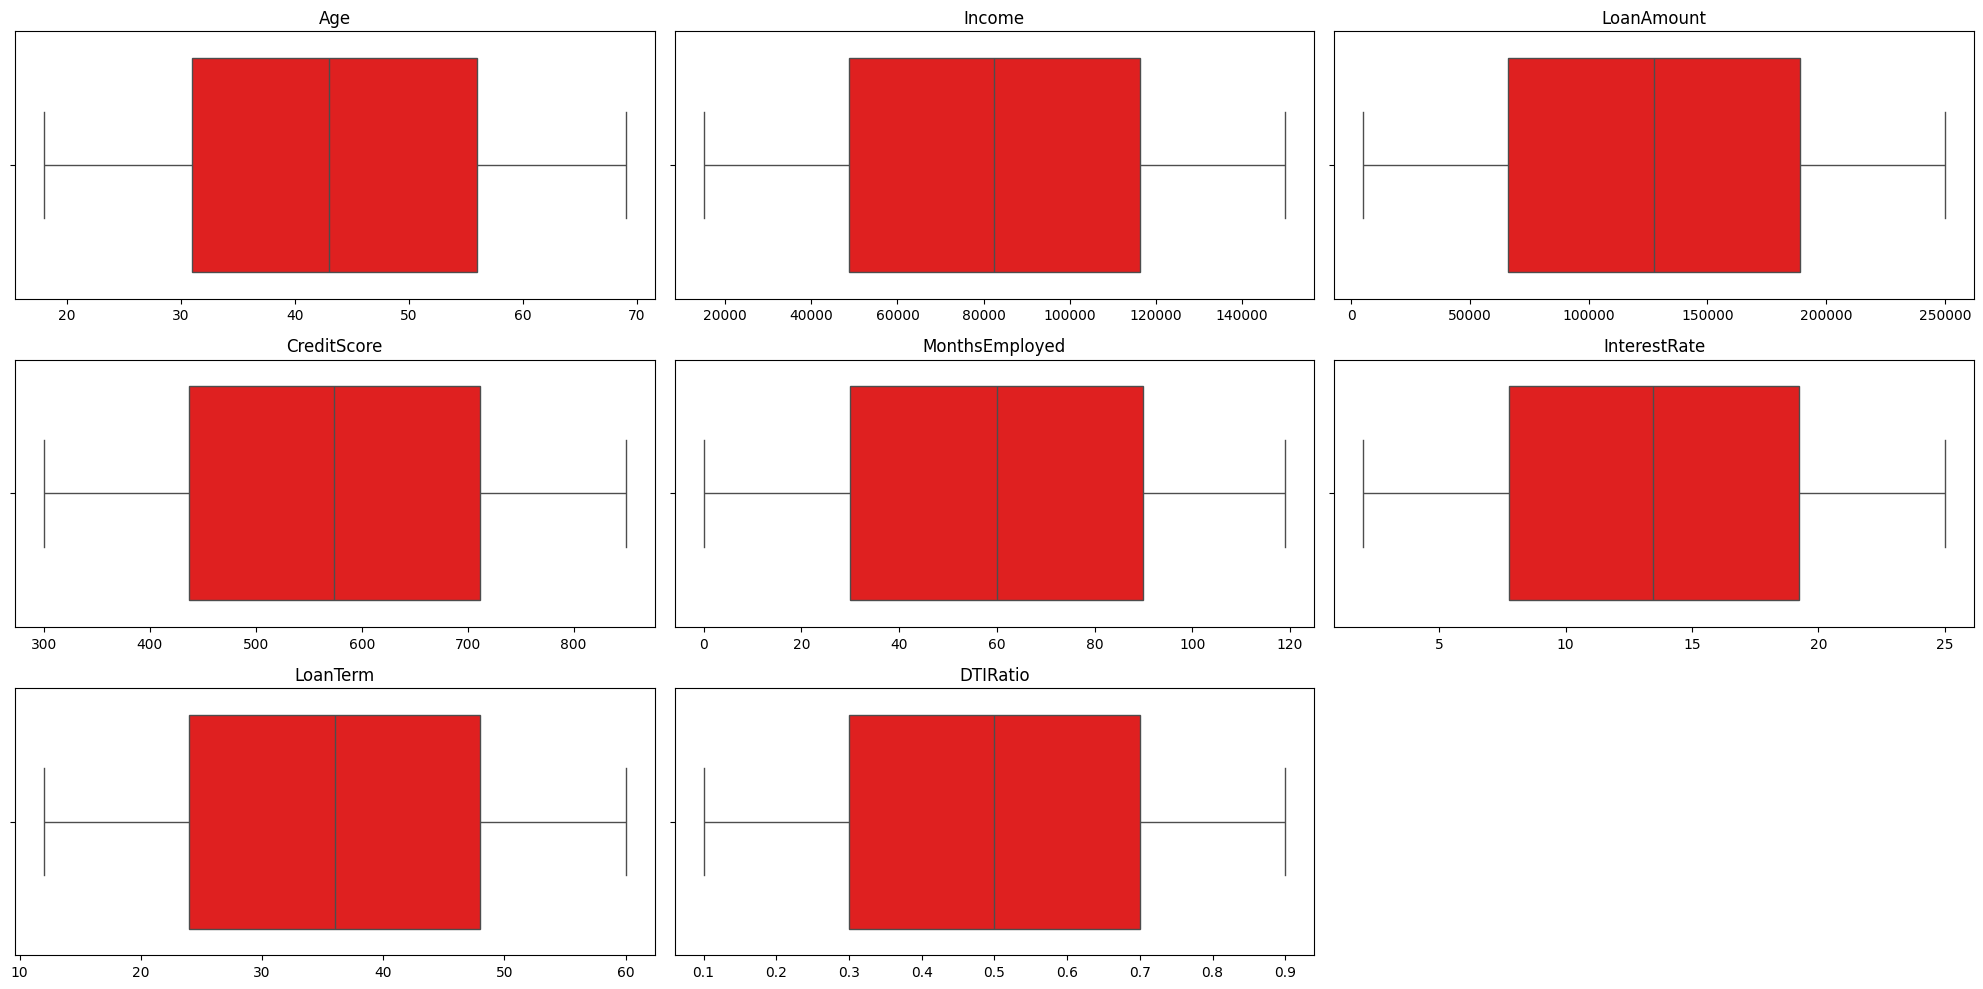

In [12]:
# Check for Outliers:
numerical_variables=['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'InterestRate', 'LoanTerm', 'DTIRatio']
categorical_variables=['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose','NumCreditLines', 'HasCoSigner', 'Default']
plt.figure(figsize=(20, 10))
ind=1
for  variable in (numerical_variables):
    plt.subplot(3, 3, ind)
    sns.boxplot(x=df[variable],color="red")
    plt.title(variable)
    ind+=1
    plt.xlabel('')
plt.tight_layout()
plt.show()

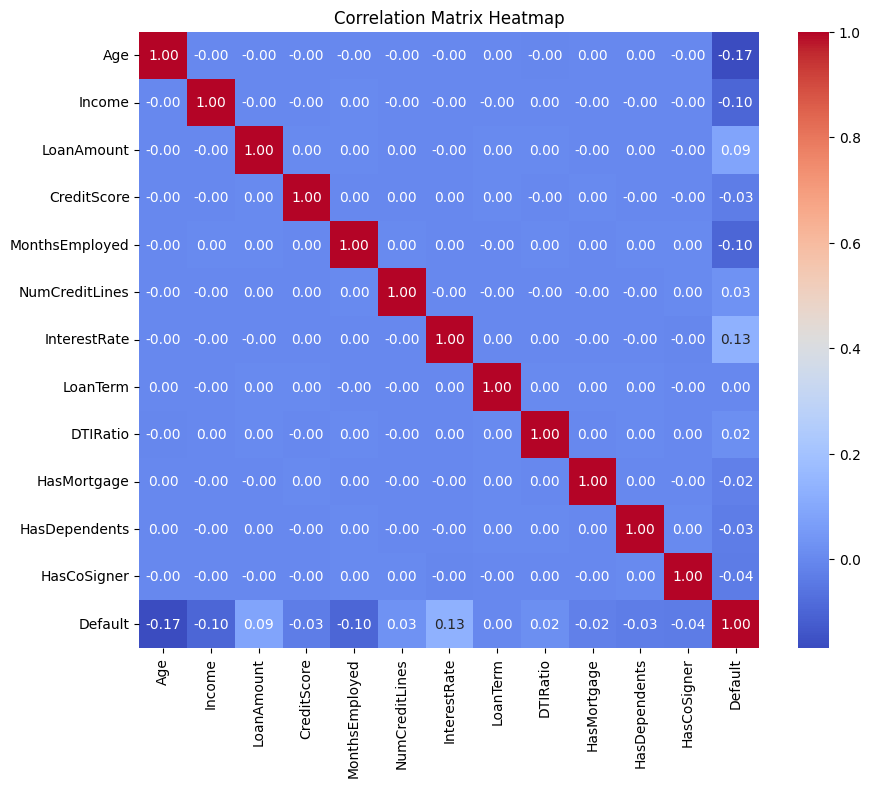

In [13]:
# Calculate Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()



In [14]:
# Drop some unessesery feature variables 'LoanID','Education', 'EmploymentType', 'MaritalStatus' and 'LoanPurpose'
df = df.drop('Age', axis=1)
df = df.drop('MonthsEmployed', axis=1)
df = df.drop('NumCreditLines', axis=1)
df = df.drop('LoanTerm', axis=1)
df = df.drop('HasMortgage', axis=1)
df = df.drop('HasDependents', axis=1)
df = df.drop('HasCoSigner', axis=1)
# Check the new data Information again
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Income        255347 non-null  int64  
 1   LoanAmount    255347 non-null  int64  
 2   CreditScore   255347 non-null  int64  
 3   InterestRate  255347 non-null  float64
 4   DTIRatio      255347 non-null  float64
 5   Default       255347 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 11.7 MB


In [15]:
data = df.to_numpy()

X = data[:, :5]
y = data[:, 5]
print(X.shape)
print(y.shape)
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

(255347, 5)
(255347,)


X_train shape: (204277, 5)
X_test shape: (51070, 5)
y_train shape: (204277,)
y_test shape: (51070,)


In [16]:
from sklearn.model_selection import train_test_split

# Assuming 'X' contains the features and 'y' contains the labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (204277, 5)
X_test shape: (51070, 5)
y_train shape: (204277,)
y_test shape: (51070,)


In [17]:
# feature scaling
X_scaled = (X_train-X_train.mean(axis=0))/(X_train.max(axis=0)-X_train.min(axis=0))
X_scaled[:5]

array([[ 0.40792726,  0.33301702,  0.49530874, -0.1312238 ,  0.38677635],
       [-0.18749937, -0.49623873,  0.31680237,  0.27095011,  0.28677635],
       [ 0.01349471, -0.1325827 , -0.22053825,  0.46790664, -0.06322365],
       [-0.24230719,  0.41647076, -0.07481876,  0.0413849 , -0.41322365],
       [ 0.24402975, -0.43051574,  0.48437978,  0.47790664, -0.48822365]])

In [18]:
import torch
# convert arrays to tensors
tX = torch.tensor(X_scaled, dtype=torch.float32)
ty = torch.tensor(y_train.reshape(-1,1), dtype=torch.float32)
#print(tX.shape)
#print(ty.shape)X
X_new=torch.concat((torch.ones(len(X_train),1),tX),dim=1)
print(X_new[:5])

tensor([[ 1.0000,  0.4079,  0.3330,  0.4953, -0.1312,  0.3868],
        [ 1.0000, -0.1875, -0.4962,  0.3168,  0.2710,  0.2868],
        [ 1.0000,  0.0135, -0.1326, -0.2205,  0.4679, -0.0632],
        [ 1.0000, -0.2423,  0.4165, -0.0748,  0.0414, -0.4132],
        [ 1.0000,  0.2440, -0.4305,  0.4844,  0.4779, -0.4882]])


In [19]:
# training
theta = torch.zeros((X_new.shape[1],1), dtype=torch.float32, requires_grad=True)
alpha = 0.0001

for epoch in range(1, 1500):
  z = torch.matmul(X_new, theta)
  h = torch.sigmoid(z)

  cost = -ty*torch.log(h)-(1-ty)*torch.log(1-h)
  cost = cost.mean()

  # calculate derivatives
  cost.backward()

  # update parameters
  theta.requires_grad = False
  theta += -alpha * theta.grad
  theta.grad.zero_()
  theta.requires_grad = True

  if epoch%10 == 0:
    print(f'Epoch {epoch:02d}, Cost = {cost.item():0.4f}')

Epoch 10, Cost = 0.6930
Epoch 20, Cost = 0.6929
Epoch 30, Cost = 0.6927
Epoch 40, Cost = 0.6926
Epoch 50, Cost = 0.6924
Epoch 60, Cost = 0.6923
Epoch 70, Cost = 0.6921
Epoch 80, Cost = 0.6920
Epoch 90, Cost = 0.6918
Epoch 100, Cost = 0.6917
Epoch 110, Cost = 0.6915
Epoch 120, Cost = 0.6914
Epoch 130, Cost = 0.6913
Epoch 140, Cost = 0.6911
Epoch 150, Cost = 0.6910
Epoch 160, Cost = 0.6908
Epoch 170, Cost = 0.6907
Epoch 180, Cost = 0.6905
Epoch 190, Cost = 0.6904
Epoch 200, Cost = 0.6902
Epoch 210, Cost = 0.6901
Epoch 220, Cost = 0.6899
Epoch 230, Cost = 0.6898
Epoch 240, Cost = 0.6896
Epoch 250, Cost = 0.6895
Epoch 260, Cost = 0.6894
Epoch 270, Cost = 0.6892
Epoch 280, Cost = 0.6891
Epoch 290, Cost = 0.6889
Epoch 300, Cost = 0.6888
Epoch 310, Cost = 0.6886
Epoch 320, Cost = 0.6885
Epoch 330, Cost = 0.6883
Epoch 340, Cost = 0.6882
Epoch 350, Cost = 0.6880
Epoch 360, Cost = 0.6879
Epoch 370, Cost = 0.6878
Epoch 380, Cost = 0.6876
Epoch 390, Cost = 0.6875
Epoch 400, Cost = 0.6873
Epoch 410

In [20]:
# Evaluate
h = torch.sigmoid(torch.matmul(X_new, theta))
tz = ty.clone()
tz[h>=0.5] = 1
tz[h<0.5] = 0

accuracy = (tz == ty).int().sum()/len(X_train)
print(f'Accuray = {accuracy*100:.2f}%')

Accuray = 88.37%


In [21]:
X_test_scaled = (X_test-X_test.mean(axis=0))/(X_test.max(axis=0)-X_test.min(axis=0))
X_test_scaled[:5]

array([[ 0.223598  , -0.14413616,  0.01089305,  0.43603141, -0.43593083],
       [ 0.06739106,  0.01579951,  0.12018266,  0.07298793, -0.08593083],
       [-0.03187261, -0.21342991, -0.01096488,  0.19603141, -0.26093083],
       [-0.14399611, -0.47717151, -0.45358783,  0.05211836, -0.11093083],
       [-0.39117747, -0.43480991,  0.15843403,  0.06559662,  0.23906917]])

In [22]:
tX_test = torch.tensor(X_test_scaled, dtype=torch.float32)
ty_test = torch.tensor(y_test.reshape(-1,1), dtype=torch.float32)
X_new1=torch.concat((torch.ones(len(X_test),1),tX_test),dim=1)
X_new1[:4]

tensor([[ 1.0000,  0.2236, -0.1441,  0.0109,  0.4360, -0.4359],
        [ 1.0000,  0.0674,  0.0158,  0.1202,  0.0730, -0.0859],
        [ 1.0000, -0.0319, -0.2134, -0.0110,  0.1960, -0.2609],
        [ 1.0000, -0.1440, -0.4772, -0.4536,  0.0521, -0.1109]])

In [23]:
tm = torch.tensor(y_test.reshape(-1,1), dtype=torch.float32)
tn = tm.clone()
h = torch.sigmoid(torch.matmul(X_new1, theta))
tn[h>=0.5] = 1
tn[h<0.5] = 0
tm = torch.tensor(y_test.reshape(-1,1), dtype=torch.float32)

accuracy1 = (tn == tm).int().sum()/len(X_test)
print(f'Accuray = {accuracy1*100:.2f}%')

Accuray = 88.45%
